# 선형회귀

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
np.random.seed(42)

## 1. 정규 방정식을 사용한 선형회귀

- y =3X + 4

In [21]:
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)

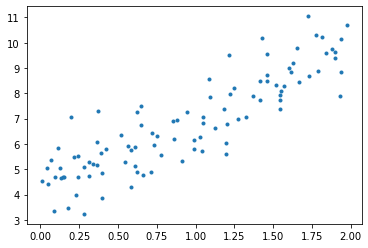

In [22]:
plt.plot(X, y, '.')

In [ ]:
np.ones((100, 1))

In [24]:
X_b = np.c_[np.ones((100, 1)), X]

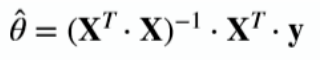

In [28]:
Image('./images/img1.png')

- 정규방정식 공식을 np.linalg 함수를 이용해서 해를 구함

In [26]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [27]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
# array([[4.21509616], # theta 0 : 절편
#        [2.77011339]]) # theta 1 : 기울기
# y = 3X + 4

- scikit-learn 제공 LinearRegression 사용

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [31]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

## 2. 경사 하강법을 사용한 선형회귀

**경사하강법**

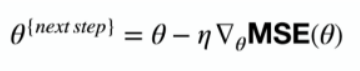

In [ ]:
Image('./images/img2.png')

**그레디언트**

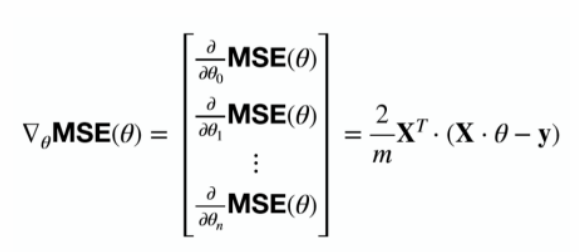

In [ ]:
Image('./images/img3.png')

- 배치 경사하강법

In [32]:
m = 100
theta = np.random.randn(2, 1)
eta = 0.1
n_iterations = 1000

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # gradients (theta1에 대한 미분, theta2에 대한 미분)
  theta = theta - eta*gradients # theta (theta 0, theta 1)

In [33]:
theta # y= 3X + 4

array([[4.21509616],
       [2.77011339]])

- 확률적 경사하강법

In [34]:
np.random.seed(42)

In [35]:
m = 100
theta = np.random.randn(2, 1)
n_epochs = 50 
t0, t1 = 5, 50
def learning_schedule(t):
  return t0/(t + t1)

for epoch in range(n_epochs): # epoch : 모든 데이터가 학습에 참여했을 때 1 epoch
  for i in range(m): # m: 100개 샘플수 (100개의 샘플중에 여러번 뽑히는 샘플도 있고, 전혀 선택되지 않는 샘플도 있음)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # gradients (theta1에 대한 미분, theta2에 대한 미분)
    eta = learning_schedule(epoch*m+ i) # step수가 증감함에 따라 eta(학습률)이 작아지게 함
    theta = theta - eta*gradients # theta (theta 0, theta 1)

In [36]:
theta # y = 3X + 4

array([[4.21076011],
       [2.74856079]])

- scikit-learn 제공하는 SGDRegressor() 사용

In [37]:
from sklearn.linear_model import SGDRegressor

In [41]:
y.shape

(100, 1)

In [43]:
y.ravel().shape

(100,)

In [45]:
y.flatten().shape

(100,)

In [46]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [48]:
sgd_reg.intercept_, sgd_reg.coef_ # y= 3X + 4

(array([4.24365286]), array([2.8250878]))

In [ ]:
# 선형회귀 모델의 잠재적인 문제점
# - 데이터 자체가 선형적으로 표현이 안될 수 있음 -> 비선형적인 데이터를 표현할 수 있게 특성 추가(다항회귀)
# - 시간을 두고 쌓인 데이터, 지리적으로 가까운 데이터인 경우 잘 동작을 안함 -> 다른 모델 사용(ARIMA, ARMA 등)
# - 데이터(엄밀히는 예측과 실제의 차이)가 정규분포를 따르지 않으면 선형회귀 모델에서 성능이 떨어질 수 있음 -> 로그변환
# - 바깥값이 있어도 잘 동작을 안함 -> 바깥값은 삭제
# - 다중공선성 문제 -> 상관관계 큰 특성을 삭제 또는 제 3의 특성을 추출

## 3. 다항 회귀

## 4. 규제 모델

### 4.1 릿지 회귀 - L2 규제

### 4.2 라쏘 회귀 - L1 규제

### 4.3  엘라스틱넷